In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from langdetect import detect, DetectorFactory
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
input = '../data/data_intermediaire_train.parquet'

In [3]:
df = pd.read_parquet(input)
df.iloc[0]['text']

'The Sea Is Watching has been made from an original Akira Kurosawa script, and it is indeed a lush and warm film. Watching it will be a pleasure !<br /><br />Kei Kumai as director is certainly no equal to the old but everlasting master (particularly the mass scenes in the beginning of the film has some terrible acting), but the overall mood and scenery is very enjoyable. Another thing that is missed here: Kurosawa always managed to let the characters be so much more then what they are actually showing and doing.<br /><br />Probably that was his magic on set while shooting; and just maybe this script was not fully up to par yet.<br /><br />Maybe we just miss the eye of the master.<br /><br />This is one lovely and sweet film, but it is no Kurosawa. To expect that might well be very silly...'

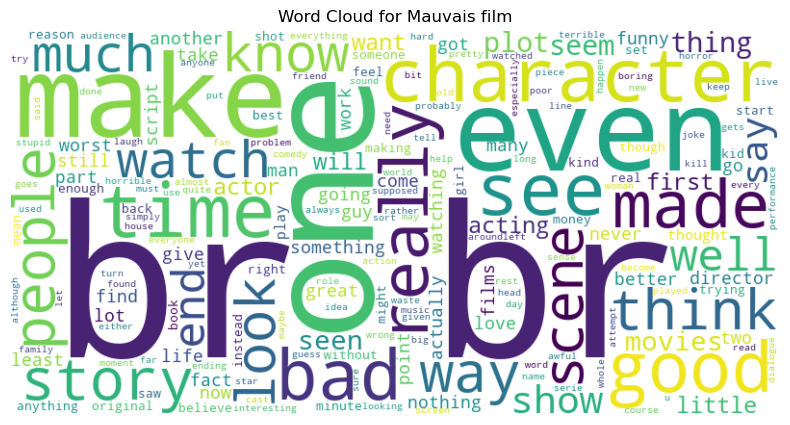

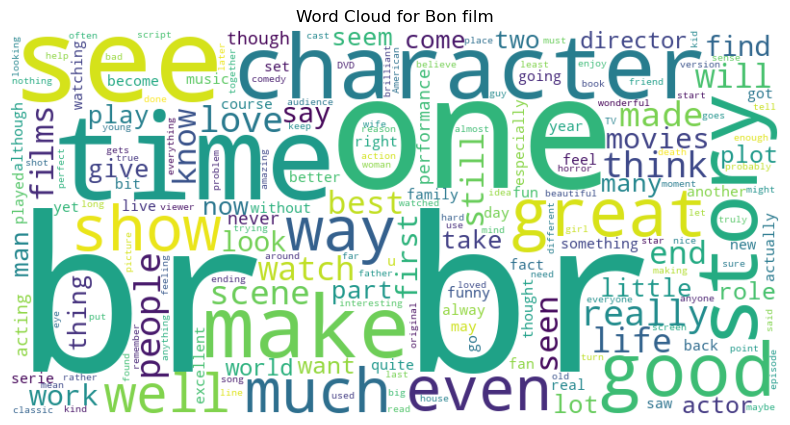

In [4]:
additional_stopwords = set(["movie","film"])
stopwords = STOPWORDS.union(additional_stopwords)

for label, category in [(0, "Mauvais film"), (1, "Bon film")]:
    category_data = df[df['label'] == label]['text'].str.cat(sep=' ')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(category_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category}")
    plt.show()

In [5]:
nltk.download('punkt')

DetectorFactory.seed = 0  
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['language'] = df['text'].apply(detect_language)

language_counts = df['language'].value_counts()
print("Distribution des langues détectées :")
print(language_counts)

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Distribution des langues détectées :
language
en    24999
nl        1
Name: count, dtype: int64



Statistiques sur le nombre de mots :
count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: word_count, dtype: float64


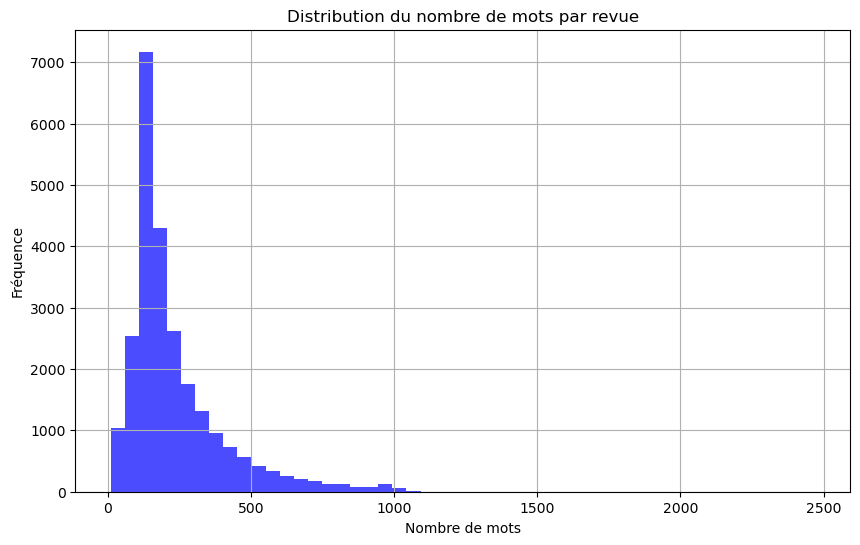

In [6]:
def count_words(text):
    if isinstance(text, str):  
        words = text.split()  
        return len(words)
    return 0

df['word_count'] = df['text'].apply(count_words)

word_count_distribution = df['word_count'].describe()
print("\nStatistiques sur le nombre de mots :")
print(word_count_distribution)

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution du nombre de mots par revue')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()